In [90]:
import numpy as np
import pandas as pd 
import networkx as nx
%pip install matplotlib networkx numpy scipy
from scipy.stats import norm

import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
df = pd.read_csv(r"C:\Users\umber\Downloads\witcher_network.csv")
df = df.drop("Type", axis=1)
df = df.drop("Unnamed: 0", axis=1)
df

,Source,Target,Weight,book
0,Velerad,Geralt,1,1
1,Geralt,Foltest,5,1
2,Foltest,Geralt,4,1
3,Adda,Geralt,1,1
4,Geralt,Ostrit,4,1
...,...,...,...,...
2595,Lytta,Ciri,2,7
2596,Lytta,Triss,1,7
2597,Triss,Dandelion,1,7
2598,Triss,Yarpen,1,7


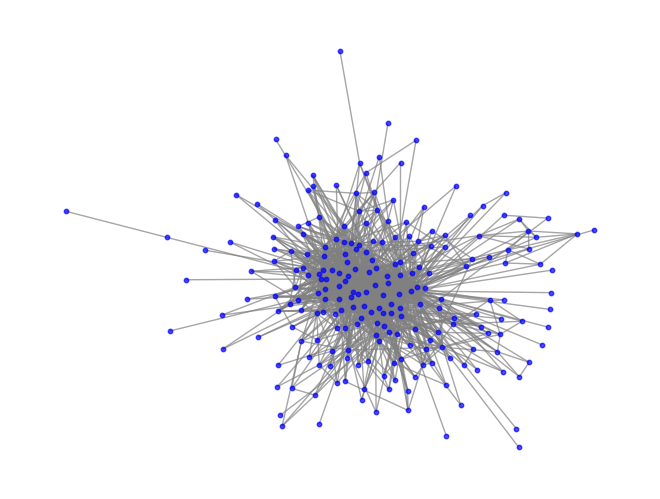

In [92]:

#troppo distanti dal resto e rovinano la visualizzazione
df = df.drop(df.index[df['Source'] == 'Vreemde'])
df = df.drop(df.index[df['Source'] == 'Morteisen'])
df = df.drop(df.index[df['Target'] == 'Vreemde'])
df = df.drop(df.index[df['Target'] == 'Morteisen'])


# Creare un grafo da DataFrame utilizzando NetworkX
G = nx.from_pandas_edgelist(df, 'Source', 'Target', ['Weight'])
# Plottare il grafo con i pesi sugli archi senza etichette sui nodi
pos = nx.spring_layout(G)
edge_labels = {(row['Source'], row['Target']): row['Weight'] for index, row in df.iterrows()}

nx.draw(G, pos, with_labels=False, node_size=10, node_color='blue', font_size=10, font_color='black', font_weight='bold', edge_color='gray', linewidths=1, alpha=0.7)


# Mostrare il plot
plt.show()



In [93]:
G1 = nx.from_pandas_edgelist(df, 'Source', 'Target', ['Weight'])
num_nodi = G1.number_of_nodes()
num_archi = G1.number_of_edges()
grado_medio = sum(dict(G1.degree()).values()) / num_nodi
densita = nx.density(G1)
clustering_medio = nx.average_clustering(G1)
raggio = nx.radius(G1)
diametro = nx.diameter(G1)

# Stampa delle caratteristiche del grafo
print(f"Numero di nodi: {num_nodi}")
print(f"Numero di archi: {num_archi}")
print(f"Grado medio: {grado_medio}")
print(f"Densità: {densita}")
print(f"Clustering medio: {clustering_medio}")
print(f"Raggio del grafo: {raggio}")
print(f"Diametro del grafo: {diametro}")

Numero di nodi: 222
Numero di archi: 1266
Grado medio: 11.405405405405405
Densità: 0.05160816925522808
Clustering medio: 0.5739259309740234
Raggio del grafo: 3
Diametro del grafo: 5


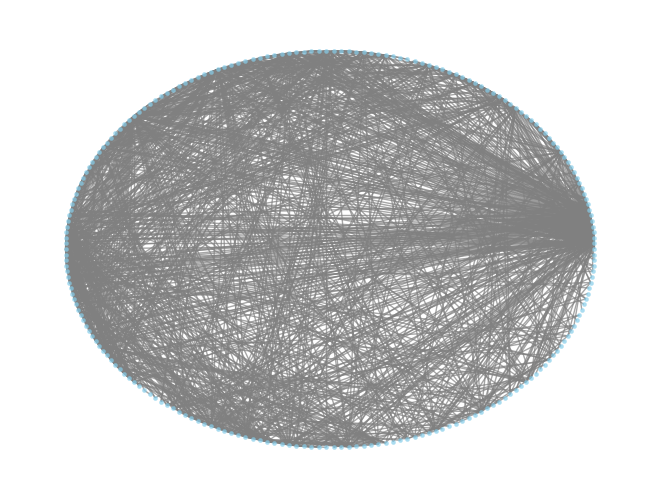

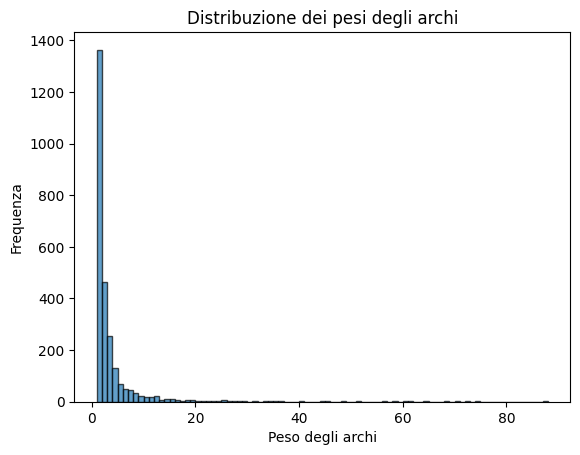

In [94]:
pos_circular = nx.circular_layout(G)
nx.draw(G, pos_circular, with_labels=False, node_size=10, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', edge_color='grey', linewidths=0.1, alpha=0.7)

# Mostrare il plot
plt.show()

# Visualizzare la distribuzione dei pesi in un istogramma
pesi = df['Weight']
plt.hist(pesi, bins=range(min(pesi), max(pesi) + 1), edgecolor='black', alpha=0.7)
plt.xlabel('Peso degli archi')
plt.ylabel('Frequenza')
plt.title('Distribuzione dei pesi degli archi')
plt.show()


In [95]:
#prendiamo i più importanti
most_influential = nx.degree_centrality(G)

characters = []

for w in sorted(G, key=most_influential.get, reverse=True):
    characters.append([w,most_influential[w]])
    sorted_influential = (w, most_influential[w])


top_characters = characters[0:10]

bottom_characters = characters[-10:]


print("Top 10 nodi per degree centrality:")
for node, centrality in top_characters:
    print(f"{node}: {centrality}")

print("\nBottom 10 nodi per degree centrality:")
for node, centrality in bottom_characters:
    print(f"{node}: {centrality}")

eminenza_grise = max(most_influential, key=most_influential.get)

print(f"L'eminenza grise nel grafo è il nodo: {eminenza_grise} con centralità di grado {most_influential[eminenza_grise]}")

Top 10 nodi per degree centrality:
Geralt: 0.6199095022624435
Ciri: 0.46153846153846156
Yennefer: 0.3257918552036199
Dandelion: 0.31221719457013575
Emhyr: 0.28054298642533937
Triss: 0.20361990950226247
Philippa: 0.20361990950226247
Vilgefortz: 0.1990950226244344
King: 0.19457013574660637
Calanthe: 0.17647058823529413

Bottom 10 nodi per degree centrality:
Fergus: 0.004524886877828055
Jacob: 0.004524886877828055
Reynard: 0.004524886877828055
Fulko: 0.004524886877828055
Milton: 0.004524886877828055
Ramon: 0.004524886877828055
Kobus: 0.004524886877828055
Elan: 0.004524886877828055
Aillil: 0.004524886877828055
Braathens: 0.004524886877828055
L'eminenza grise nel grafo è il nodo: Geralt con centralità di grado 0.6199095022624435


C:\Users\umber\AppData\Local\Temp\ipykernel_20612\1314228517.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.1)


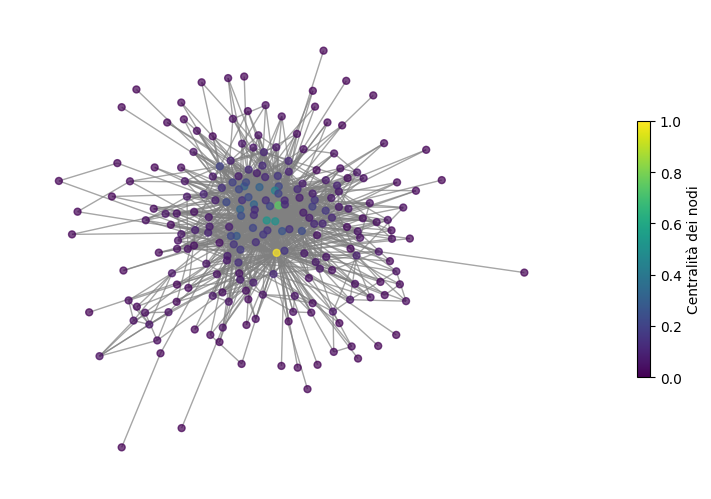

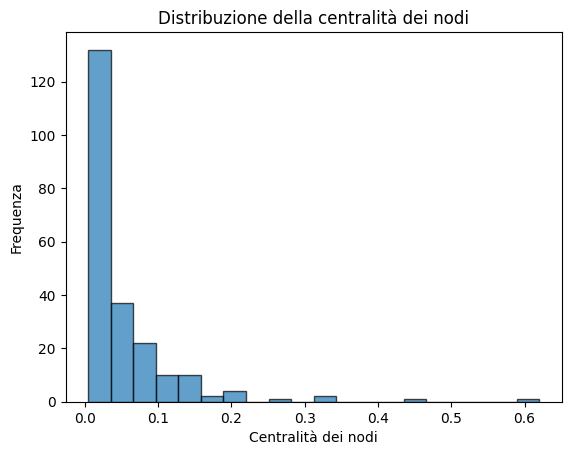

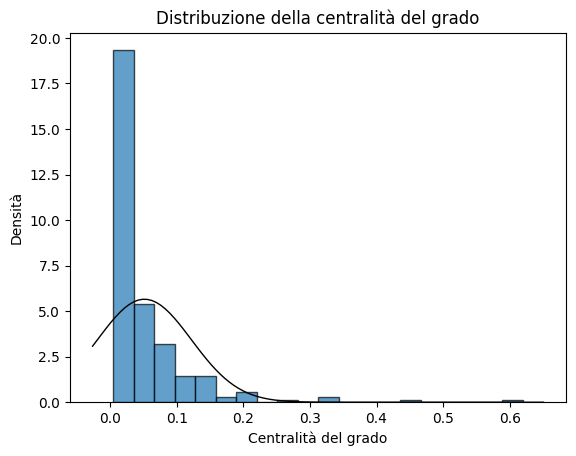

In [96]:

# Creare un grafico basato sulla centralità dei nodi con una scala di colori diversa
pos = nx.spring_layout(G)

# Normalizzare i valori di centralità tra 0 e 1
normalized_centrality = {node: (centrality - min(most_influential.values())) / (max(most_influential.values()) - min(most_influential.values())) for node, centrality in most_influential.items()}

# Creare una mappa di colori con la scala "viridis"
color_map = [plt.cm.viridis(normalized_centrality[node]) for node in G.nodes]

# Disegnare il grafo con la scala di colori "viridis"
nx.draw(G, pos, with_labels=False, node_size=25, node_color=color_map, font_size=10, font_color='black', font_weight='bold', edge_color='gray', linewidths=1, alpha=0.7)

# Aggiungere la legenda dei colori
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.1)
cbar.set_label('Centralità dei nodi')

# Mostrare il plot
plt.show()

centralita_valori = list(most_influential.values())
plt.hist(centralita_valori, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Centralità dei nodi')
plt.ylabel('Frequenza')
plt.title('Distribuzione della centralità dei nodi')
plt.show()

centralities = list(most_influential.values())
plt.hist(centralities, bins=20, edgecolor='black', alpha=0.7, density=True)
plt.xlabel('Centralità del grado')
plt.ylabel('Densità')
plt.title('Distribuzione della centralità del grado')

# Calcolare la PDF
mu, std = norm.fit(centralities)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)

# Mostrare il plot della distribuzione e della PDF
plt.show()



Top 10 nodi per closness centrality:
Geralt: 0.7198697068403909
Ciri: 0.638728323699422
Dandelion: 0.5800524934383202
Yennefer: 0.5785340314136126
Emhyr: 0.5623409669211196
Triss: 0.537712895377129
King: 0.5351089588377724
Philippa: 0.5351089588377724
Vilgefortz: 0.53125
Two: 0.5249406175771971

Bottom 10 nodi per closness centrality:
Zyvik: 0.325
Jacob: 0.3235724743777452
Elan: 0.3235724743777452
Carthia: 0.32262773722627736
Isengrim: 0.3184438040345821
Ramon: 0.31798561151079136
Tavik: 0.31170662905500707
Ekkehard: 0.30694444444444446
Ravix: 0.30191256830601093
Voymir: 0.2596944770857814


C:\Users\umber\AppData\Local\Temp\ipykernel_20612\113580245.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.1)


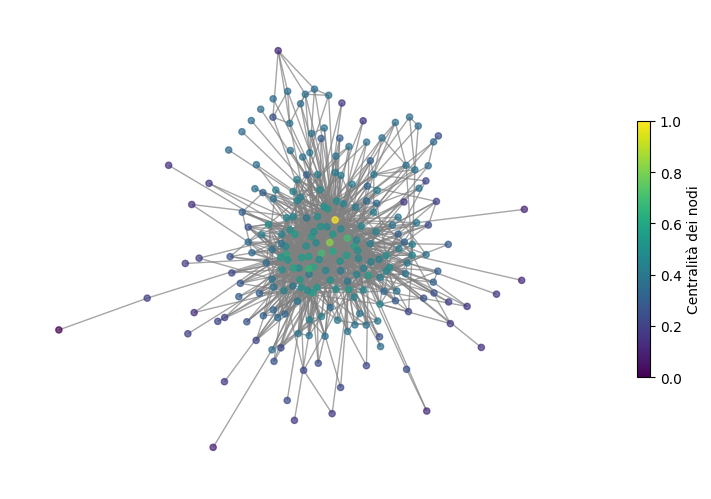

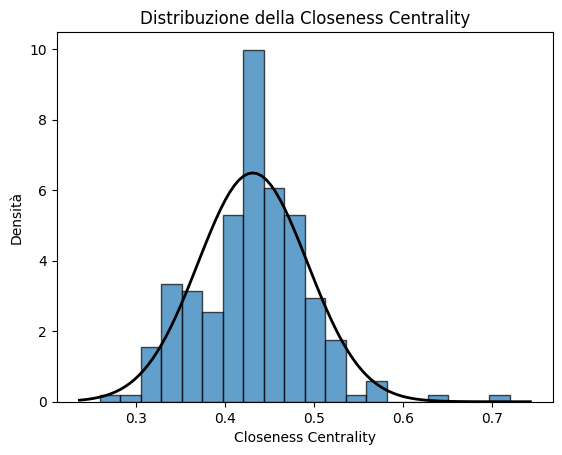

In [97]:
#studio closness centrality
#stampa migliori e peggiori 10
closeness_centrality = nx.closeness_centrality(G)
characters_closness = []

for w in sorted(G, key=closeness_centrality.get, reverse=True):
    characters_closness.append([w,closeness_centrality[w]])
    sorted_influential = (w, closeness_centrality[w])

top_characters_closness = characters_closness[0:10]
bottom_characters_closness = characters_closness[-10:]


print("Top 10 nodi per closness centrality:")
for node, centrality in top_characters_closness:
    print(f"{node}: {centrality}")

print("\nBottom 10 nodi per closness centrality:")
for node, centrality in bottom_characters_closness:
    print(f"{node}: {centrality}")

# Normalizzare la closeness centrality per l'uso nei colori
normalized_centrality = {node: (centrality - min(closeness_centrality.values())) / (max(closeness_centrality.values()) - min(closeness_centrality.values())) for node, centrality in closeness_centrality.items()}
#norm_closeness = Normalize(vmin=min(closeness_centrality.values()), vmax=max(closeness_centrality.values()))

# Impostare una size fissa per i nodi
node_size = 20
color_map = [plt.cm.viridis(normalized_centrality[node]) for node in G.nodes]

# Disegnare il grafo basato sulla closeness centrality
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=node_size, node_color=color_map, font_size=10, font_color='black', font_weight='bold', edge_color='gray', linewidths=1, alpha=0.7)

# Aggiungere la legenda per spiegare la scala del colore
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.1)
cbar.set_label('Centralità dei nodi')


# Mostrare il plot
plt.show()

# Visualizzare la distribuzione della closeness centrality
centralities = list(closeness_centrality.values())
plt.hist(centralities, bins=20, edgecolor='black', alpha=0.7, density=True)
plt.xlabel('Closeness Centrality')
plt.ylabel('Densità')
plt.title('Distribuzione della Closeness Centrality')

# Calcolare la PDF
mu, std = norm.fit(centralities)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Mostrare il plot della distribuzione e della PDF
plt.show()

Top 10 nodi per betweenness centrality:
Geralt: 0.3917440422628955
Ciri: 0.14917506159328225
Dandelion: 0.07982894426906378
Yennefer: 0.06466765365243465
Emhyr: 0.05493811234282801
Philippa: 0.03149287159019953
King: 0.029237746366548783
Two: 0.02675858110676938
Calanthe: 0.026046495732286203
Vilgefortz: 0.02548346376030657

Bottom 10 nodi per betweenness centrality:
Milton: 0.0
Ramon: 0.0
Kobus: 0.0
Elan: 0.0
Aillil: 0.0
Braathens: 0.0
Ambassador: 0.0
Eudora: 0.0
Alzur: 0.0
Lytta: 0.0


C:\Users\umber\AppData\Local\Temp\ipykernel_20612\1663064064.py:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.1)


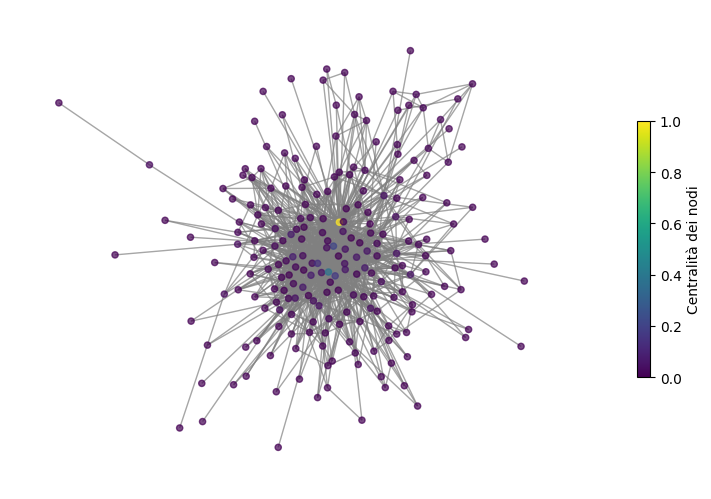

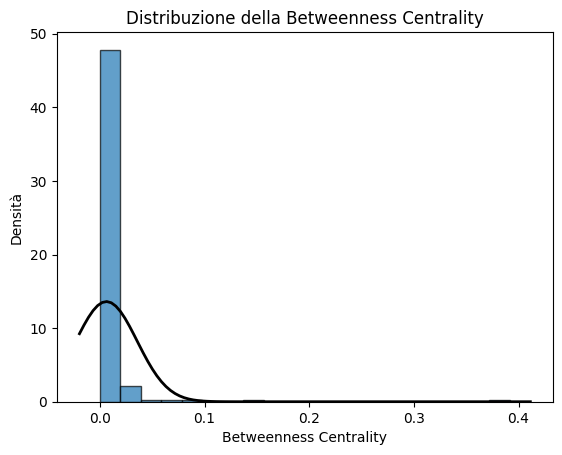

In [98]:
#studio beetwins centrality
# Calcolare la betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Stampare i migliori e i peggiori 10
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
top_betweenness = sorted_betweenness[:10]
bottom_betweenness = sorted_betweenness[-10:]

print("Top 10 nodi per betweenness centrality:")
for node, centrality in top_betweenness:
    print(f"{node}: {centrality}")

print("\nBottom 10 nodi per betweenness centrality:")
for node, centrality in bottom_betweenness:
    print(f"{node}: {centrality}")

# Normalizzare la betweenness centrality per l'uso nei colori
normalized_centrality = {node: (centrality - min(betweenness_centrality.values())) / (max(betweenness_centrality.values()) - min(betweenness_centrality.values())) for node, centrality in betweenness_centrality.items()}

# Impostare una size fissa per i nodi
node_size = 20
color_map = [plt.cm.viridis(normalized_centrality[node]) for node in G.nodes]

# Disegnare il grafo basato sulla betweenness centrality
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=node_size, node_color=color_map, font_size=10, font_color='black', font_weight='bold', edge_color='gray', linewidths=1, alpha=0.7)

# Aggiungere la legenda per spiegare la scala del colore
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.1)
cbar.set_label('Centralità dei nodi')

# Mostrare il plot
plt.show()

# Visualizzare la distribuzione della betweenness centrality
centralities = list(betweenness_centrality.values())
plt.hist(centralities, bins=20, edgecolor='black', alpha=0.7, density=True)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Densità')
plt.title('Distribuzione della Betweenness Centrality')

# Calcolare la PDF
mu, std = norm.fit(centralities)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Mostrare il plot della distribuzione e della PDF
plt.show()

Top 10 nodi per Eigenvector Centrality:
Geralt: 0.302577502003062
Ciri: 0.28564285851311527
Yennefer: 0.22734753044606196
Emhyr: 0.21115462350645878
Dandelion: 0.20568817120094926
Philippa: 0.17647792950492772
Triss: 0.17249151145375274
Vilgefortz: 0.16579293031765818
King: 0.15865417507186894
Two: 0.13863423224966143

Bottom 10 nodi per Eigenvector Centrality:
Zyvik: 0.0034726338756409457
Milton: 0.0027996369269419168
Jacob: 0.0027684214624397177
Tavik: 0.0023931249919045875
Elan: 0.002195399783254648
Ramon: 0.0019023941320151193
Isengrim: 0.0017897549745039842
Ekkehard: 0.001167097670443136
Ravix: 0.0007753468028294944
Voymir: 0.00023996386041819196


C:\Users\umber\AppData\Local\Temp\ipykernel_20612\378228977.py:31: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.1)


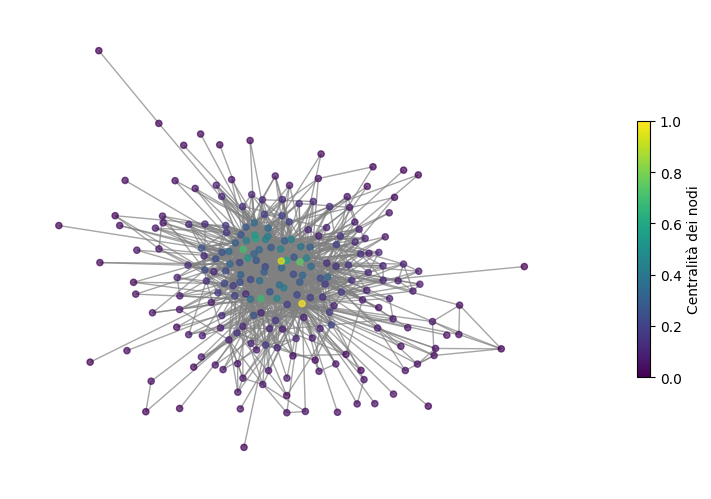

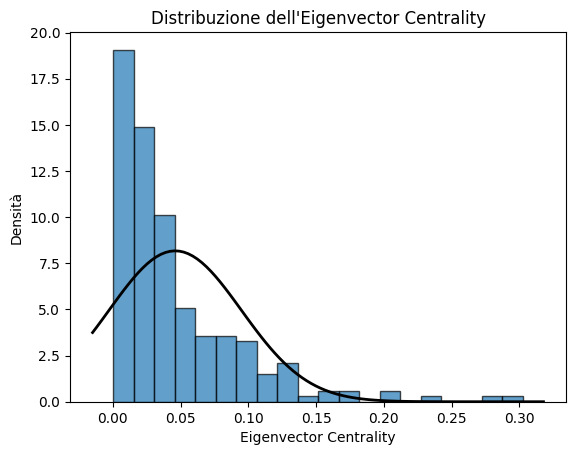

In [99]:
# Calcolare l'Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Stampare i migliori e i peggiori 10
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)
top_eigenvector = sorted_eigenvector[:10]
bottom_eigenvector = sorted_eigenvector[-10:]

print("Top 10 nodi per Eigenvector Centrality:")
for node, centrality in top_eigenvector:
    print(f"{node}: {centrality}")

print("\nBottom 10 nodi per Eigenvector Centrality:")
for node, centrality in bottom_eigenvector:
    print(f"{node}: {centrality}")

# Normalizzare l'Eigenvector Centrality per l'uso nei colori
normalized_centrality = {node: (centrality - min(eigenvector_centrality.values())) / (max(eigenvector_centrality.values()) - min(eigenvector_centrality.values())) for node, centrality in eigenvector_centrality.items()}

# Impostare una size fissa per i nodi
node_size = 20
color_map = [plt.cm.viridis(normalized_centrality[node]) for node in G.nodes]

# Disegnare il grafo basato sull'Eigenvector Centrality
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=node_size, node_color=color_map, font_size=10, font_color='black', font_weight='bold', edge_color='gray', linewidths=1, alpha=0.7)

# Aggiungere la legenda per spiegare la scala del colore
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.1)
cbar.set_label('Centralità dei nodi')

# Mostrare il plot
plt.show()

# Visualizzare la distribuzione dell'Eigenvector Centrality
centralities = list(eigenvector_centrality.values())
plt.hist(centralities, bins=20, edgecolor='black', alpha=0.7, density=True)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Densità')
plt.title('Distribuzione dell\'Eigenvector Centrality')

# Calcolare la PDF
mu, std = norm.fit(centralities)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Mostrare il plot della distribuzione e della PDF
plt.show()

In [100]:
#triadi
def trova_triadi(grafo):
    triadi = []
    nodi = list(grafo.nodes())
 
    for i in range(len(nodi)):
        for j in range(i + 1, len(nodi)):
            for k in range(j + 1, len(nodi)):
                if grafo.has_edge(nodi[i], nodi[j]) and grafo.has_edge(nodi[j], nodi[k]) and grafo.has_edge(nodi[i], nodi[k]):
                    triade = (nodi[i], nodi[j], nodi[k])
                    triadi.append(triade)
 
    return triadi
 
# Esempio di utilizzo:  # Sostituisci con il tuo grafo
triadi_trovate = trova_triadi(G)
 
#for triade in triadi_trovate:
 #   print(triade)

def trova_triadi_con_peso(grafo):
    triadi = []
    nodi = list(grafo.nodes())
 
    for i in range(len(nodi)):
        for j in range(i + 1, len(nodi)):
            for k in range(j + 1, len(nodi)):
                if (
                    grafo.has_edge(nodi[i], nodi[j])
                    and grafo.has_edge(nodi[j], nodi[k])
                    and grafo.has_edge(nodi[i], nodi[k])
                ):
                    # Aggiungi la triade alla lista con i pesi degli archi
                    triade = (
                        nodi[i],
                        nodi[j],
                        nodi[k],
                        grafo[nodi[i]][nodi[j]]['Weight'],
                        grafo[nodi[j]][nodi[k]]['Weight'],
                        grafo[nodi[i]][nodi[k]]['Weight'],
                    )
                    triadi.append(triade)
 
    return triadi
 
def stampa_prime_10_triadi_maggiori(triadi):
    # Ordina la lista di triadi in base al peso totale
    triadi_ordinate = sorted(triadi, key=lambda x: sum(x[3:]), reverse=True)
 
    # Stampa le prime 10 triadi
    for i, triade in enumerate(triadi_ordinate[:10]):
        print(f'Triade {i + 1}: {triade}, Peso Totale: {sum(triade[3:])}')
 
triadi_trovate = trova_triadi_con_peso(G)
stampa_prime_10_triadi_maggiori(triadi_trovate)


Triade 1: ('Geralt', 'Yennefer', 'Ciri', 15, 44, 28), Peso Totale: 87
Triade 2: ('Yennefer', 'Ciri', 'Kelpie', 44, 36, 5), Peso Totale: 85
Triade 3: ('Yennefer', 'Ciri', 'Vilgefortz', 44, 11, 20), Peso Totale: 75
Triade 4: ('Yennefer', 'Triss', 'Ciri', 15, 12, 44), Peso Totale: 71
Triade 5: ('Geralt', 'Dandelion', 'Ciri', 28, 12, 28), Peso Totale: 68
Triade 6: ('Yennefer', 'Ciri', 'Fabio', 44, 21, 1), Peso Totale: 66
Triade 7: ('Geralt', 'Ciri', 'Kelpie', 28, 36, 1), Peso Totale: 65
Triade 8: ('Geralt', 'Dandelion', 'Rience', 28, 29, 6), Peso Totale: 63
Triade 9: ('Geralt', 'Ciri', 'Vilgefortz', 28, 11, 22), Peso Totale: 61
Triade 10: ('Yennefer', 'Crach', 'Ciri', 10, 6, 44), Peso Totale: 60


In [101]:




def eminenza_grigia(graph, max_iterations=100, tolerance=1e-6):
    # Inizializza la centralità di ciascun nodo
    centrality = {node: 1.0 for node in graph.nodes}

    for _ in range(max_iterations):
        # Calcola i nuovi punteggi di ciascun nodo come media pesata di degree centrality ed eigenvector centrality
        new_centrality = {}
        for node in graph.nodes:
            degree_centrality = nx.degree_centrality(graph)[node]
            eigenvector_centrality = nx.eigenvector_centrality(graph)[node]

            # Media pesata
            new_centrality[node] = 0.5 * degree_centrality + 0.5 * eigenvector_centrality

        # Normalizza i punteggi dividendo per il massimo
        max_centrality = max(new_centrality.values())
        new_centrality = {node: value / max_centrality for node, value in new_centrality.items()}

        # Verifica la convergenza o il cambiamento minimo
        if all(abs(new_centrality[node] - centrality[node]) < tolerance for node in graph.nodes):
            break

        centrality = new_centrality

    # Ordina i nodi in base ai punteggi di Eminenza Grigia in ordine decrescente
    sorted_nodes = sorted(centrality, key=centrality.get, reverse=True)
    
    return centrality, sorted_nodes

# Esempio di utilizzo con un grafo di esempio
eminenza_grigia_centrality, sorted_nodes = eminenza_grigia(G)

# Visualizza i punteggi di Eminenza Grigia ordinati per ciascun nodo
print("Punteggi di Eminenza Grigia ordinati:")
for node in sorted_nodes:
    print(f"Nodo {node}: {eminenza_grigia_centrality[node]}")




Punteggi di Eminenza Grigia ordinati:
Nodo Geralt: 1.0
Nodo Ciri: 0.809964060844945
Nodo Yennefer: 0.5996175372574465
Nodo Dandelion: 0.5614229397014077
Nodo Emhyr: 0.5330130480518729
Nodo Philippa: 0.41203598234950567
Nodo Triss: 0.40771460109129604
Nodo Vilgefortz: 0.3955480687043613
Nodo King: 0.38290437608897965
Nodo Calanthe: 0.3371510681868426
Nodo Two: 0.331771662163397
Nodo Cahir: 0.29941856384955634
Nodo Rience: 0.29853420213961673
Nodo Milva: 0.2958194375073492
Nodo Francesca: 0.290352571119267
Nodo Sabrina: 0.2880160985515826
Nodo Zoltan: 0.2752801747981556
Nodo Foltest: 0.2749786642422341
Nodo Fringilla: 0.271468947871964
Nodo Falka: 0.2633059120377742
Nodo Sir: 0.26101764563668267
Nodo Count: 0.25686500733672696
Nodo Assire: 0.2513930912366438
Nodo Baron: 0.2508966327508965
Nodo Aen: 0.2453843779695746
Nodo Tissaia: 0.22367969740465718
Nodo Vissegerd: 0.22124568764506777
Nodo Pavetta: 0.21734453096372564
Nodo Beau: 0.211981049834909
Nodo Margarita: 0.21168997962907868
Nodo

Lista di tutti i cliques in ordine decrescente di dimensione:
Clique 1: ['Geralt', 'Ciri', 'Yennefer', 'Triss', 'Emhyr', 'Tissaia', 'Philippa', 'Sabrina', 'Francesca', 'Margarita', 'King']
Clique 2: ['Geralt', 'Ciri', 'Yennefer', 'Triss', 'Emhyr', 'Tissaia', 'Philippa', 'Sabrina', 'Francesca', 'Margarita', 'Vilgefortz']
Clique 3: ['Geralt', 'Ciri', 'Yennefer', 'Triss', 'Emhyr', 'Tissaia', 'Philippa', 'Sabrina', 'Francesca', 'Keira', 'Vilgefortz']
Clique 4: ['Geralt', 'Ciri', 'Yennefer', 'Triss', 'Emhyr', 'Margarita', 'Philippa', 'Fringilla', 'Sabrina', 'Vilgefortz', 'Francesca']
Clique 5: ['Geralt', 'Ciri', 'Yennefer', 'Triss', 'Emhyr', 'Keira', 'Philippa', 'Vilgefortz', 'Fringilla', 'Sabrina', 'Francesca']
Clique 6: ['Assire', 'Ciri', 'Yennefer', 'Emhyr', 'Philippa', 'Sabrina', 'Francesca', 'Triss', 'Margarita', 'King']
Clique 7: ['Assire', 'Ciri', 'Yennefer', 'Emhyr', 'Philippa', 'Sabrina', 'Francesca', 'Triss', 'Margarita', 'Fringilla']
Clique 8: ['Assire', 'Ciri', 'Yennefer', 'Emhy

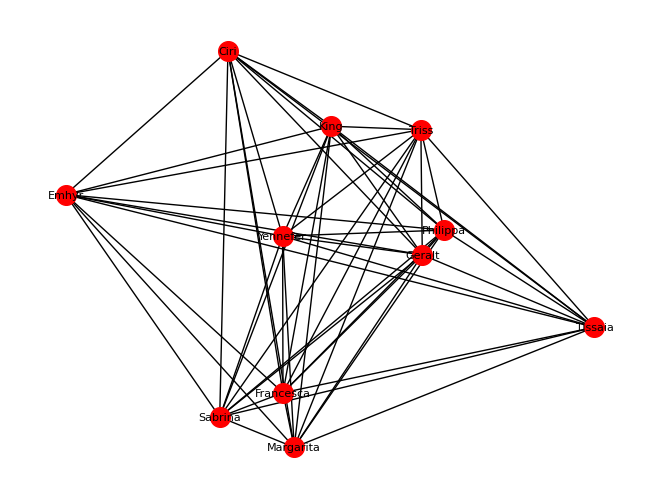

In [102]:
#CLIQUE

# Individuare tutti i cliques nel grafo
all_cliques = list(nx.find_cliques(G))
# Ordina i cliques in ordine decrescente di dimensione
all_cliques_sorted = sorted(all_cliques, key=len, reverse=True)
# Stampa la lista di tutti i cliques in ordine
print("Lista di tutti i cliques in ordine decrescente di dimensione:")
for i, clique in enumerate(all_cliques_sorted, 1):
    print(f"Clique {i}: {clique}")

# Grafica Clique più grande, quindi il primo
first_clique = all_cliques_sorted[0]
first_clique_subgraph = G.subgraph(first_clique)
pos = nx.spring_layout(G)
nx.draw(first_clique_subgraph, pos, with_labels=True, node_color='red', node_size=200, font_size=8)
plt.show()


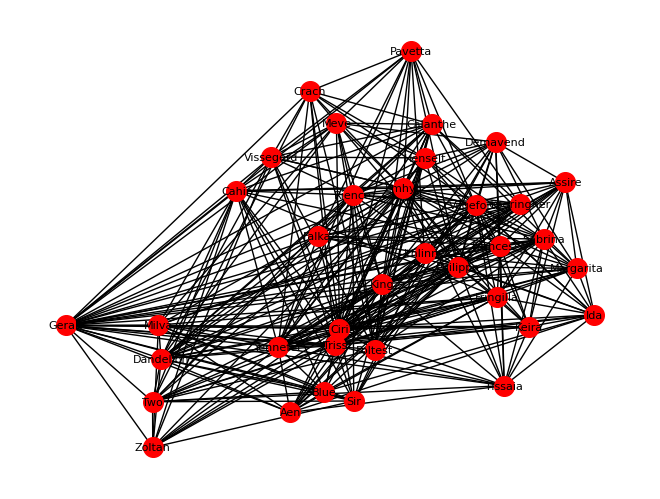

In [103]:
#K-CORE

# Calcola il k-core e il main core
k_core = nx.k_core(G)
main_core = max(nx.connected_components(k_core), key=len)
# Estrai il sottografo corrispondente al main core
main_core_subgraph = G.subgraph(main_core)
# Visualizza il sottografo del main core
pos = nx.spring_layout(G)
nx.draw(main_core_subgraph, pos, with_labels=True, node_color='red', node_size=200, font_size=8)
plt.show()


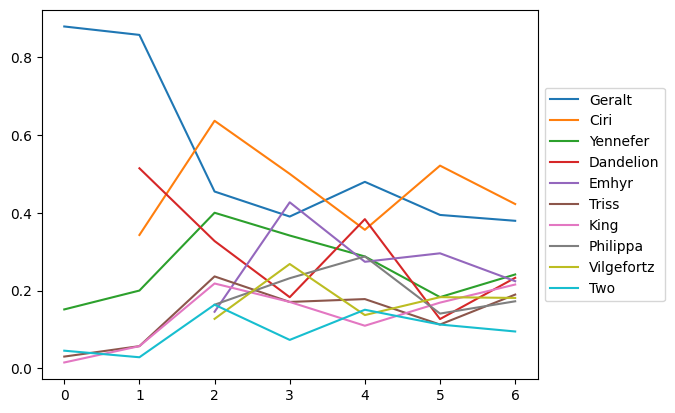

Axes(0.125,0.11;0.775x0.77)


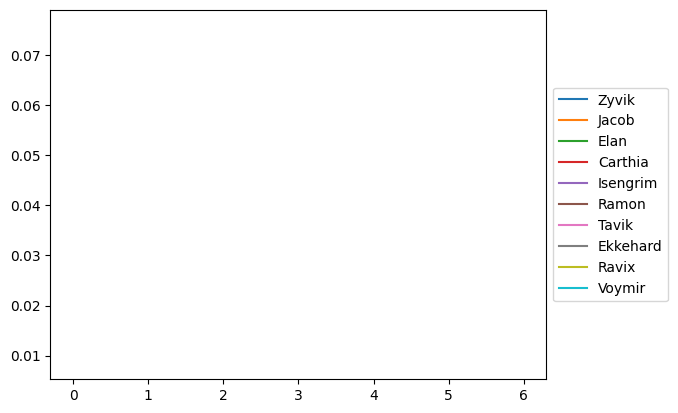

In [119]:
# Analisi dell'evoluzione personaggi

book_1 = df.loc[df['book'] == 1]
book_2 = df.loc[df['book'] == 2]
book_3 = df.loc[df['book'] == 3]
book_4 = df.loc[df['book'] == 4]
book_5 = df.loc[df['book'] == 5]
book_6 = df.loc[df['book'] == 6]
book_7 = df.loc[df['book'] == 7]
G_book1 = nx.Graph()

for _, edge in book_1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['Weight'])
deg_cen_book1 = nx.degree_centrality(G_book1)

books = [G_book1]
book_fnames = [book_2, book_3, book_4, book_5, book_6, book_7]
for book_fname in book_fnames:
    book = book_fname
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['Weight'])
    books.append(G_book)


# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of Geralt, Ciri, and Yennefer
ax = degree_evol_df[['Geralt', 'Ciri', 'Yennefer', 'Dandelion', 'Emhyr', 'Triss', 'King', 'Philippa', 'Vilgefortz', 'Two']].plot()

# Move the legend to the right
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

bx = degree_evol_df[['Zyvik', 'Jacob', 'Elan', 'Carthia', 'Isengrim', 'Ramon', 'Tavik', 'Ekkehard', 'Ravix', 'Voymir']].plot()

# Move the legend to the right
bx.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

print(ax)


